# Mapillary Neural network result analysis

A set of neural networks has been run on Mapillary training data set in order to predict the appearance of some typical street-scene objects (*ex* cars, pedestrian, roads, traffic signals...). This notebook aims to compare the first step results, after on training epoch.

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

%matplotlib inline

## Result recovery

The results for each model are stored in dedicated `.csv` files, in a common parent directory. We loop on these files to recover result data, and stored them within a Python dictionary, by setting the keys with the file names.

In [2]:
results={}
for file in os.listdir(os.path.join("..", "data", "results")):
    results[file.split(".")[0]] = pd.read_csv(os.path.join("..", "data", "results", file))

In [3]:
list(results.keys())

['cnn_mapil_2_0_2_1_1_0',
 'cnn_mapil_3_1_3_1_1_0',
 'cnn_mapil_3_1_3_0_1_0',
 'cnn_mapil_3_0_3_0_2_1',
 'cnn_mapil_2_0_2_1_1_1',
 'cnn_mapil_3_1_3_0_2_0',
 'cnn_mapil_3_0_3_1_1_1',
 'cnn_mapil_1_0_1_0_1_1',
 'cnn_mapil_1_1_1_0_1_1',
 'cnn_mapil_2_1_2_0_1_0',
 'cnn_mapil_3_0_3_0_1_1',
 'cnn_mapil_3_1_3_1_2_1',
 'cnn_mapil_2_0_2_0_1_0',
 'cnn_mapil_2_0_2_0_2_1',
 'cnn_mapil_2_1_2_1_1_0',
 'cnn_mapil_3_1_3_1_1_1',
 'cnn_mapil_3_0_3_0_1_0',
 'cnn_mapil_2_0_2_0_2_0',
 'cnn_mapil_2_0_2_1_2_1',
 'cnn_mapil_3_1_3_1_2_0',
 'cnn_mapil_1_0_1_1_1_1',
 'cnn_mapil_1_1_1_0_1_0',
 'cnn_mapil_2_1_2_0_1_1',
 'cnn_mapil_1_0_1_1_1_0',
 'cnn_mapil_2_1_2_1_2_1',
 'cnn_mapil_6_0_6_0_2_0',
 'cnn_mapil_3_0_3_1_2_1',
 'cnn_mapil_3_1_3_0_2_1',
 'cnn_mapil_1_1_1_1_1_1',
 'cnn_mapil_2_1_2_0_2_0',
 'cnn_mapil_2_0_2_0_1_1',
 'cnn_mapil_2_1_2_1_2_0',
 'cnn_mapil_2_1_2_0_2_1',
 'cnn_mapil_3_0_3_1_1_0',
 'cnn_mapil_2_0_2_1_2_0',
 'cnn_mapil_2_1_2_1_1_1',
 'cnn_mapil_1_0_1_0_1_0',
 'cnn_mapil_3_0_3_1_2_0',
 'cnn_mapil_

We consider only the last training iteration, for each model, so as to compare them with each other.

In [4]:
train_results = []
for k in results.keys():
    result_columns = list(results[k].columns)
    cur_results = results[k].tail(1).values
    train_results.append(cur_results)

We transform this information in a Pandas DataFrame as follows:

In [5]:
train_results = pd.DataFrame(np.array(train_results).reshape([-1, 206]), columns = result_columns, index=results.keys())

In [6]:
train_results.head(4).T

,cnn_mapil_2_0_2_1_1_0,cnn_mapil_3_1_3_1_1_0,cnn_mapil_3_1_3_0_1_0,cnn_mapil_3_0_3_0_2_1
epoch,890.000000,890.000000,890.000000,890.000000
loss,0.340069,0.336791,0.331017,0.339083
bpmll_loss,12.871417,12.800213,12.745441,12.789697
hamming_loss,0.143939,0.143939,0.142424,0.148485
accuracy,0.856061,0.856061,0.857576,0.851515
precision,0.825000,0.825000,0.825000,0.826471
recall,0.700472,0.700472,0.703791,0.672249
F_measure,0.757653,0.757653,0.759591,0.741425
accuracy_label0,0.950000,0.950000,0.950000,0.950000
precision_label0,0.000000,0.000000,0.000000,0.000000


## Qualify the link between model hyperparameters and results

### Simple qualification through plots

By using `seaborn`, we will plot the training result as clearly as possible, to shed the light on most significant features.

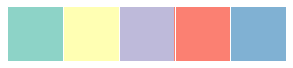

In [7]:
palette = sns.color_palette("Set3", n_colors=5)
sns.palplot(palette)

As a beginning, we can observe that model accuracy is generally comprised between around 0.74 and 0.86, whilst F1-scores are comprised between around 0.61 and 0.76.

(0.6, 0.9)

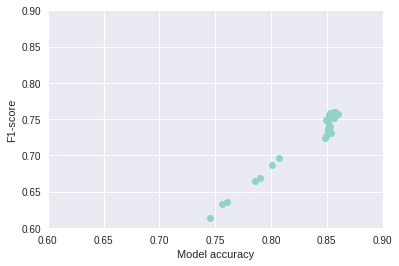

In [8]:
plt.plot(train_results.accuracy, train_results.F_measure, "o", color=palette[0])
plt.xlabel("Model accuracy")
plt.ylabel("F1-score")
plt.xlim(0.6, 0.9)
plt.ylim(0.6, 0.9)

We consider as more interesting to compare model hyperparameters and subsequent results. As an example, we have considered neural network models with alternatively 1, 2 or 3 convolutional and pooling layers, and 1 or 2 fully-connected layers.

In [9]:
model_meta = []
for model in train_results.index:
    model_meta.append(model.split('_')[2:])
model_meta = pd.DataFrame(model_meta, dtype='int16',
                          columns=["nb_conv", "conv_level", "nb_pool", "pool_level", "nb_fullconn", "fullconn_level"])

In [10]:
train_results = model_meta.set_index(train_results.index).join(train_results)

By comparing the main model evaluation metrics (accuracy, precision, recall, F1-score) with the number of used convolutional layers, a clear observation must be done. The accuracy and the precision (and consequently the F1-score) are greatly impacted if only one convolutional (+pooling) layer is considered. The recall does not seem to be impacted in the same manner.

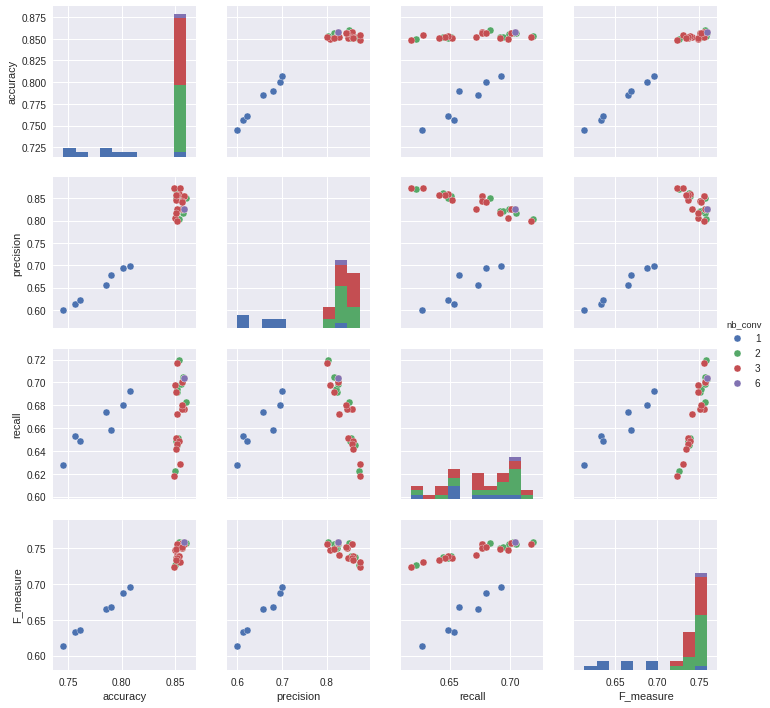

In [11]:
sns.pairplot(train_results, vars=["accuracy", "precision", "recall", "F_measure"], hue="nb_conv")

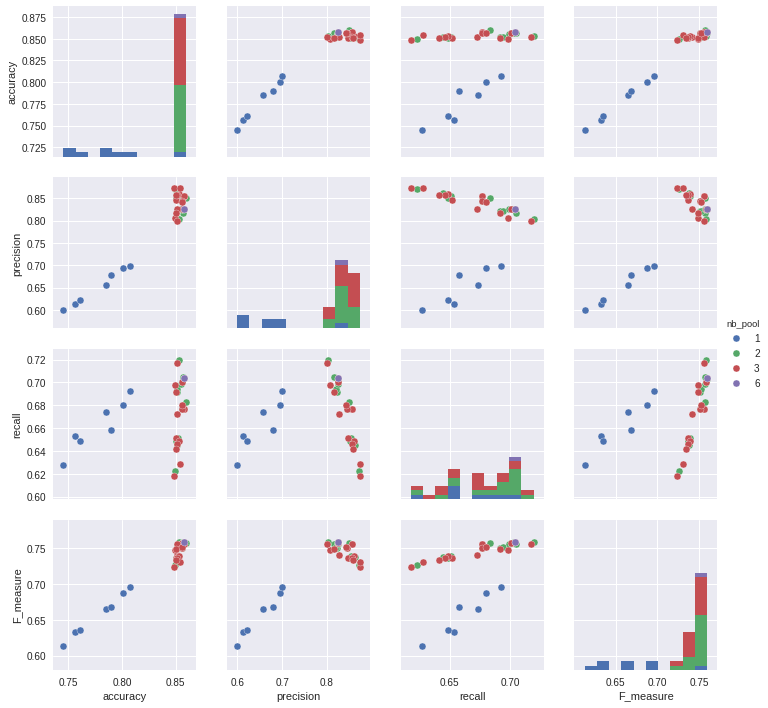

In [12]:
sns.pairplot(train_results, vars=["accuracy", "precision", "recall", "F_measure"], hue="nb_pool")

If we consider the number of fully-connected layer, the conclusion is more toned. Considering only one layer seems less performing, however we have to add a precision : the numbers of fully-connected and convolutional layers are not independent. Neural network models with only one convolutional layer are necessarily composed of a single fully-connected layer as well...

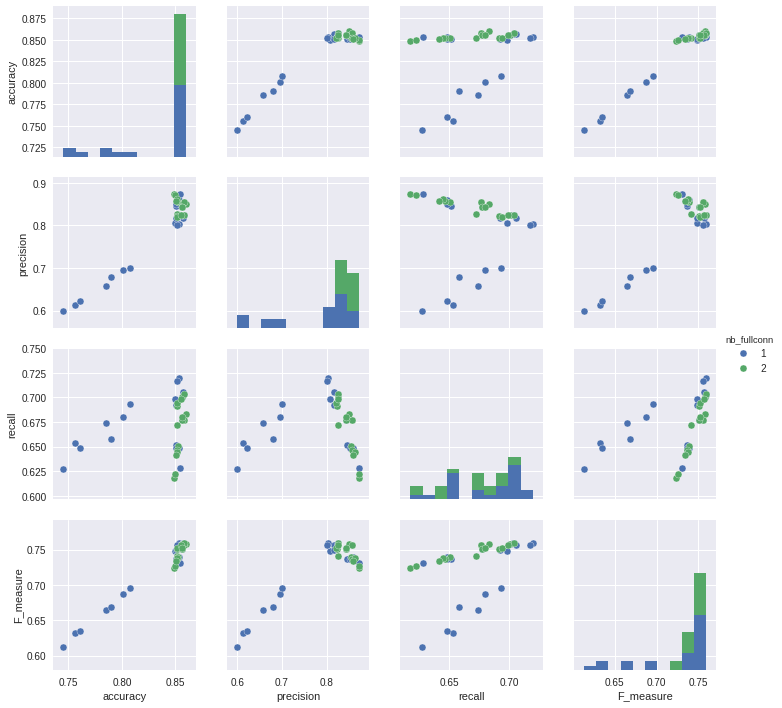

In [13]:
sns.pairplot(train_results, vars=["accuracy", "precision", "recall", "F_measure"], hue="nb_fullconn")

### Focus on metric value evolution for each model 

#### Accuracy

Instead of considering the last value of each metric for every model, we can consider the whole evolution of specific metrics during training process. We consider only 90 first rows of the results, so as to focus on the first training epoch.

In [14]:
model_accuracies = pd.concat([results[k].accuracy for k in results.keys()], axis=1).iloc[:90]

In [15]:
cols = model_accuracies.columns = list(results.keys())
cols.sort()
model_accuracies = model_accuracies[cols]
model_accuracies.index = results[model_accuracies.columns[0]].epoch
model_accuracies.tail().T

epoch,850,860,870,880,890
cnn_mapil_1_0_1_0_1_0,0.806061,0.784091,0.805303,0.823485,0.807576
cnn_mapil_1_0_1_0_1_1,0.727273,0.737879,0.769697,0.780303,0.800758
cnn_mapil_1_0_1_1_1_0,0.818939,0.784091,0.837121,0.838636,0.790152
cnn_mapil_1_0_1_1_1_1,0.737121,0.734091,0.780303,0.791667,0.785606
cnn_mapil_1_1_1_0_1_0,0.784091,0.784848,0.794697,0.833333,0.756061
cnn_mapil_1_1_1_0_1_1,0.801515,0.753788,0.805303,0.825758,0.745455
cnn_mapil_1_1_1_1_1_0,0.809091,0.775000,0.821212,0.815909,0.760606
cnn_mapil_1_1_1_1_1_1,0.840152,0.846970,0.860606,0.871212,0.856061
cnn_mapil_2_0_2_0_1_0,0.843182,0.843182,0.859091,0.862879,0.856818
cnn_mapil_2_0_2_0_1_1,0.840152,0.846970,0.861364,0.868182,0.856061


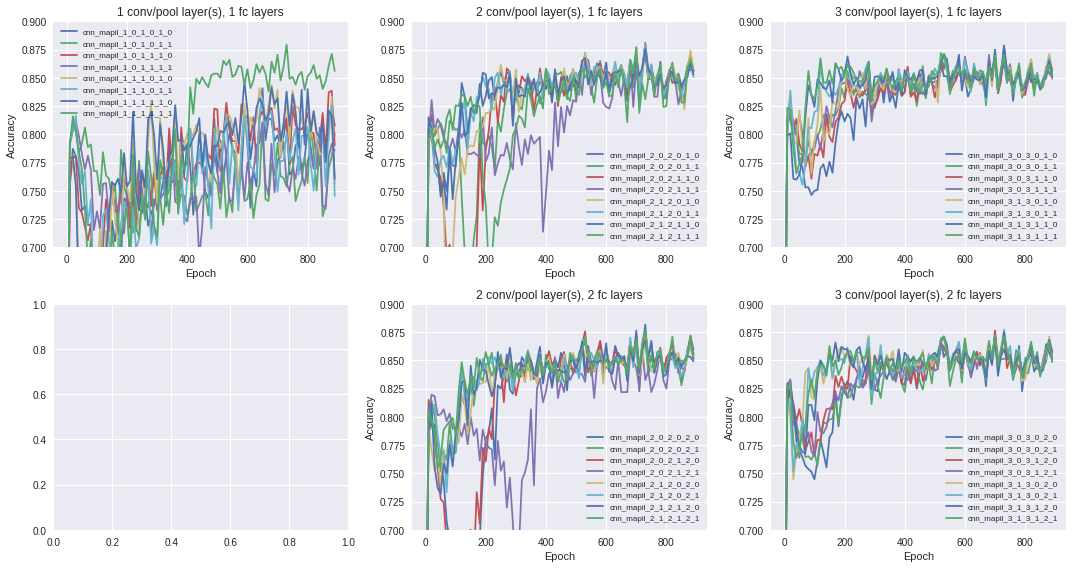

In [16]:
nbmax_conv = 3
nbmax_fc = 2
f, ax = plt.subplots(nbmax_fc, nbmax_conv, figsize=(15, 8))
for index in range(nbmax_conv * nbmax_fc):
    # Split the model_accuracies dataframe according to the number of convolution layer within the neural network
    model_acc_plot = model_accuracies.iloc[:,[col.split('_')[2:7:4] == [str(index%3+1), str(int(index/3)+1)] for col in model_accuracies.columns]]
    if model_acc_plot.shape[1] > 0:
        a = ax[int(index/3)][index%3]
        a.plot(model_acc_plot)
        a.set_xlabel("Epoch")
        a.set_ylabel("Accuracy")
        a.set_ylim(0.7, 0.9)
        a.legend(model_acc_plot.columns, prop={'size': 8})
        a.set_title("{} conv/pool layer(s), {} fc layers".format(index%3+1, int(index/3)+1))
plt.tight_layout()

#### Precision

In [18]:
model_precisions = pd.concat([results[k].precision for k in results.keys()], axis=1).iloc[:90]
cols = model_precisions.columns = list(results.keys())
cols.sort()
model_precisions = model_precisions[cols]
model_precisions.index = results[model_precisions.columns[0]].epoch

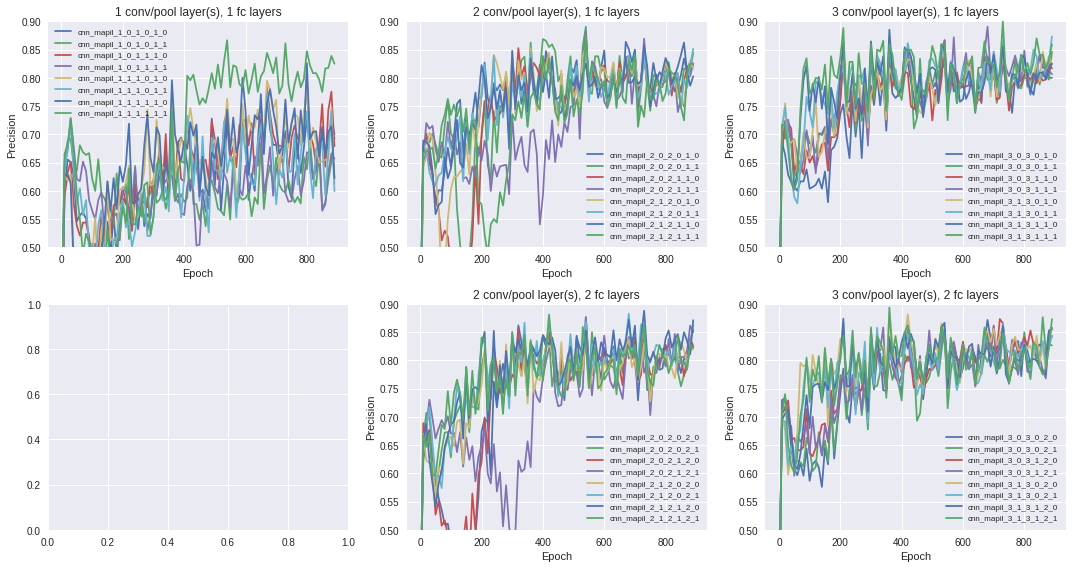

In [19]:
nbmax_conv = 3
nbmax_fc = 2
f, ax = plt.subplots(nbmax_fc, nbmax_conv, figsize=(15, 8))
for index in range(nbmax_conv * nbmax_fc):
    model_prec_plot = model_precisions.iloc[:,[col.split('_')[2:7:4] == [str(index%3+1), str(int(index/3)+1)] for col in model_precisions.columns]]
    if model_prec_plot.shape[1] > 0:
        a = ax[int(index/3)][index%3]
        a.plot(model_prec_plot)
        a.set_xlabel("Epoch")
        a.set_ylabel("Precision")
        a.set_ylim(0.5, 0.9)
        a.legend(model_prec_plot.columns, prop={'size': 8})
        a.set_title("{} conv/pool layer(s), {} fc layers".format(index%3+1, int(index/3)+1))
plt.tight_layout()

#### Recall

In [20]:
model_recalls = pd.concat([results[k].recall for k in results.keys()], axis=1).iloc[:90]
cols = model_recalls.columns = list(results.keys())
cols.sort()
model_recalls = model_recalls[cols]
model_recalls.index = results[model_recalls.columns[0]].epoch

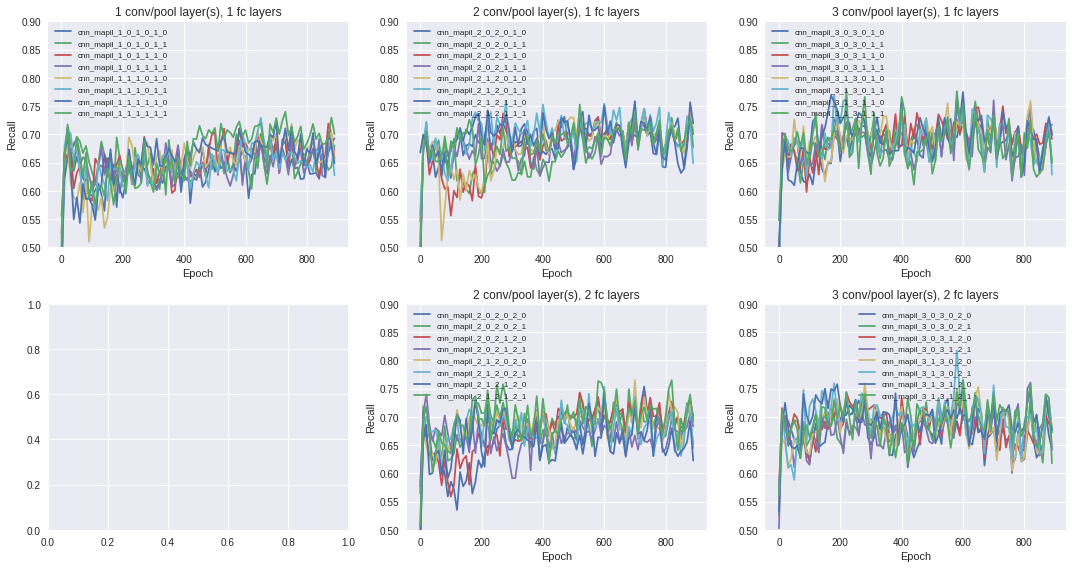

In [21]:
nbmax_conv = 3
nbmax_fc = 2
f, ax = plt.subplots(nbmax_fc, nbmax_conv, figsize=(15, 8))
for index in range(nbmax_conv * nbmax_fc):
    model_rec_plot = model_recalls.iloc[:,[col.split('_')[2:7:4] == [str(index%3+1), str(int(index/3)+1)] for col in model_recalls.columns]]
    if model_rec_plot.shape[1] > 0:
        a = ax[int(index/3)][index%3]
        a.plot(model_rec_plot)
        a.set_xlabel("Epoch")
        a.set_ylabel("Recall")
        a.set_ylim(0.5, 0.9)
        a.legend(model_rec_plot.columns, prop={'size': 8})
        a.set_title("{} conv/pool layer(s), {} fc layers".format(index%3+1, int(index/3)+1))
plt.tight_layout()

#### Generalization

In [24]:
def metric_evolution(metric, plot_metric_evol=False, plot_ylim=(0, 1)):
    model_recalls = pd.concat([results[k][metric] for k in results.keys()], axis=1).iloc[:90]
    cols = model_recalls.columns = list(results.keys())
    cols.sort()
    model_recalls = model_recalls[cols]
    model_recalls.index = results[model_recalls.columns[0]].epoch
    nbmax_conv = 3
    nbmax_fc = 2
    if plot_metric_evol:
        f, ax = plt.subplots(nbmax_fc, nbmax_conv, figsize=(15, 8))
        for index in range(nbmax_conv * nbmax_fc):
            model_rec_plot = model_recalls.iloc[:,[col.split('_')[2:7:4] == [str(index%3+1), str(int(index/3)+1)] for col in model_recalls.columns]]
            if model_rec_plot.shape[1] > 0:
                a = ax[int(index/3)][index%3]
                a.plot(model_rec_plot)
                a.set_xlabel("Epoch")
                a.set_ylabel("Recall")
                a.set_ylim(plot_ylim)
                a.legend(model_rec_plot.columns, prop={'size': 8})
                a.set_title("{} conv/pool layer(s), {} fc layers".format(index%3+1, int(index/3)+1))
        plt.tight_layout()

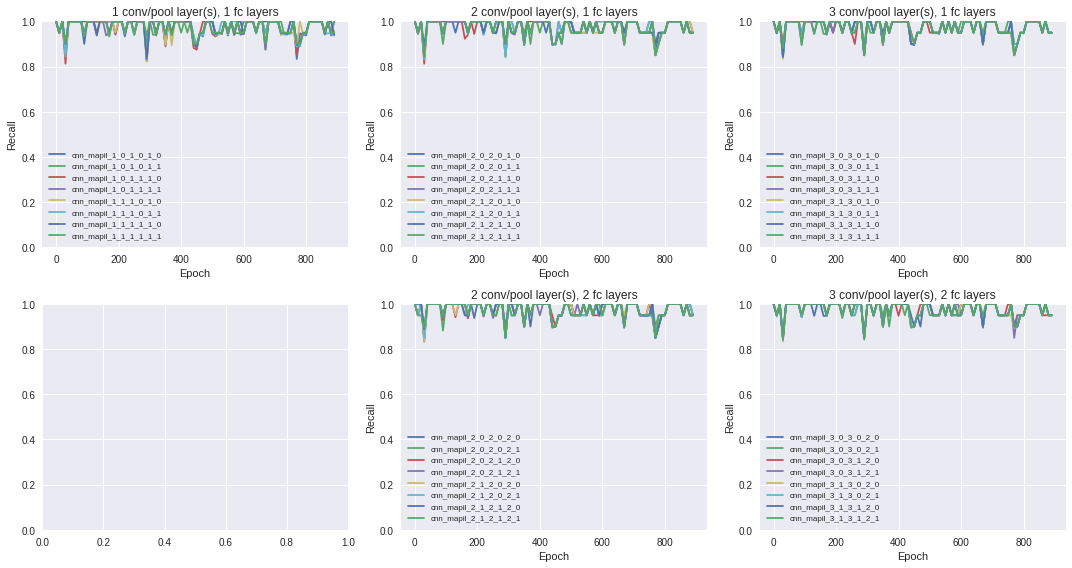

In [25]:
metric_evolution("precision_label30", True)

### Going further through correlation schemes

By considering correlation schemes between model hyperparameter values and metric values, we can provide a deeper analysis of training results, and characterize the influence of these hyperparameters.

In [26]:
raw_result_corr = train_results.corr().drop(["epoch", "nb_conv", "conv_level", "nb_pool", "pool_level", "nb_fullconn", "fullconn_level"])
result_corr = raw_result_corr.loc[:,["nb_conv", "conv_level", "nb_pool", "pool_level", "nb_fullconn", "fullconn_level"]]

We can focus on global metrics (values that are measured over all labels) or on single label-focused metrics.

In [27]:
def global_results(data):
    """Give the correlation result between model hyperparameters and results for global metrics"""
    result_corr = data.corr().drop(["epoch", "nb_conv", "conv_level", "nb_pool", "pool_level", "nb_fullconn", "fullconn_level"])
    result_corr = result_corr.loc[:,["nb_conv", "conv_level", "nb_pool", "pool_level", "nb_fullconn", "fullconn_level"]]
    return result_corr.iloc[:7]

def by_label_results(data, i):
    """Give the correlation result between model hyperparameters and results for a specific label"""
    result_corr = data.corr().drop(["epoch", "nb_conv", "conv_level", "nb_pool", "pool_level", "nb_fullconn", "fullconn_level"])
    result_corr = result_corr.loc[:,["nb_conv", "conv_level", "nb_pool", "pool_level", "nb_fullconn", "fullconn_level"]]
    return result_corr.iloc[(7+i*3):(7+(i+1)*3)]

In [28]:
by_label_results(train_results, 65)

,nb_conv,conv_level,nb_pool,pool_level,nb_fullconn,fullconn_level
accuracy_label65,0.446179,-0.083107,0.446179,0.067219,0.274043,0.217546
precision_label65,-0.042630,0.111319,-0.042630,-0.113479,-0.026183,0.226552
recall_label65,0.478404,-0.108298,0.478404,0.091263,0.293835,0.191043


In [29]:
def plot_corr_results(corr_result):
    """Plot a correlation result as a seaborn heatmap"""
    f, ax = plt.subplots(figsize=(8, 6))
    plt.title('Change set features - Pearson correlations')
    # Draw the heatmap using seaborn
    sns.heatmap(corr_result, vmax=1, 
                square=True, annot=True, annot_kws={'size':10}, fmt='.2f')

We can see here that the number of convolutional (+pooling) layers is linked with lower loss values, as well as with higher accuracy and precision values and F1-scores. The number of fully-connected layers appears to have the same effect, even if the correlation coefficient are lower, in absolute value. The level of each layer, *i.e.* high (respectively low) value for parameter dedicated to the different layers, have a small impact

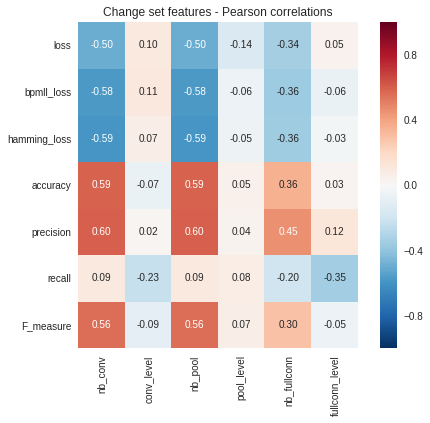

In [30]:
plot_corr_results(global_results(train_results))

We can focus on a specific label as well. As an example, the result for the label 0 are brought face to face with hyperparameter values in the next cell. We can see that the conclusion made for the global metric values are valid for the label accuracy. However, the precision on the label does not react in the same way, and follow label recall correlations.

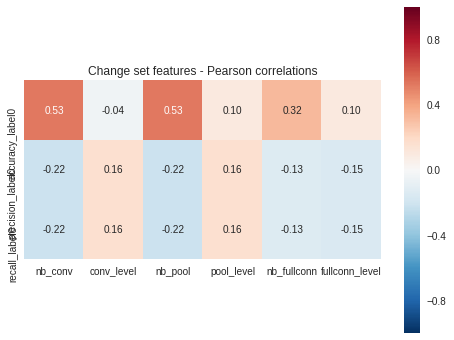

In [31]:
plot_corr_results(by_label_results(train_results, 0))

Let's generalize to every labels! (Warning: that's a huge dashboard!)

We design a plotting instruction to print the correlation matrix for each label. It highlights globally the same picture for a large amount of the 66 Mapillary labels, especially for accuracy values.

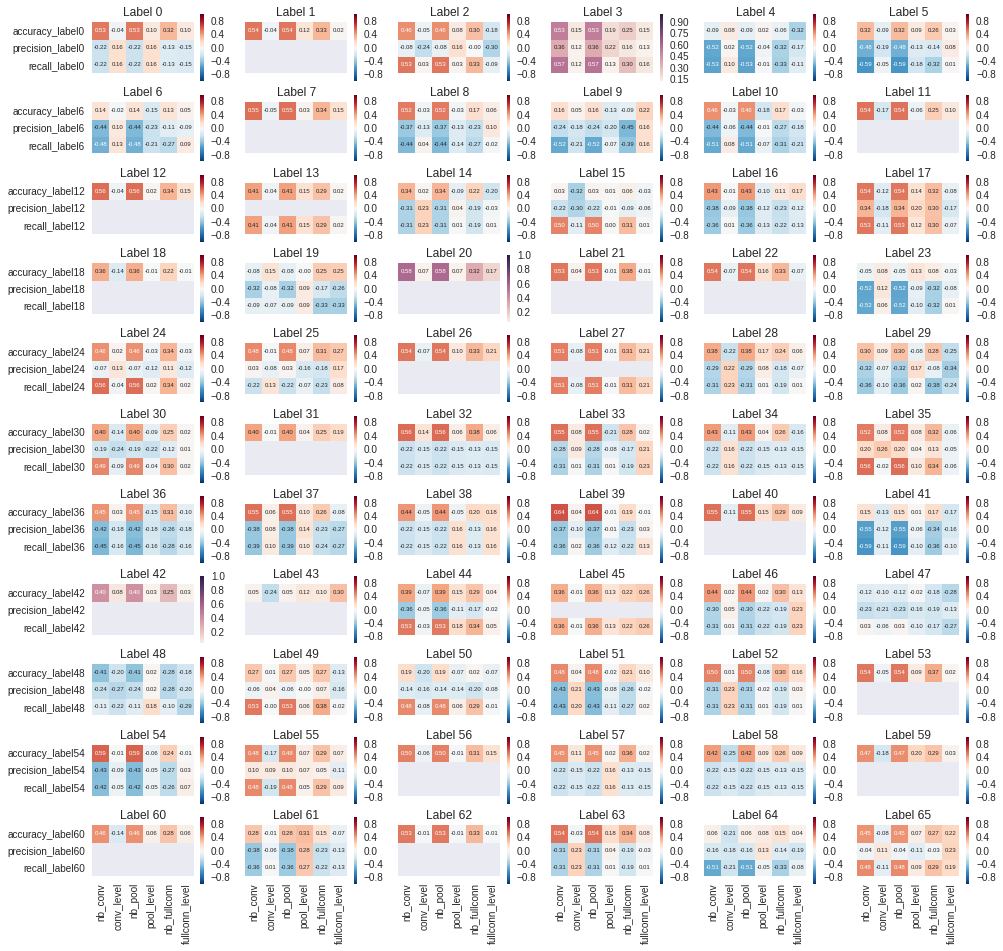

In [32]:
nx, ny = 6, 11
f, ax = plt.subplots(ny, nx, figsize=(16, 16))
for i in range(nx*ny):
    corr_result = by_label_results(train_results, i)
    sns.heatmap(corr_result, vmax=1, 
                square=True, annot=True, annot_kws={'size':6},
                fmt='.2f', ax = ax[int(i/nx)][i%nx])
    ax[int(i/nx)][i%nx].set_title("Label "+str(i))
    if int(i / nx) < ny-1:
        ax[int(i/nx)][i%nx].xaxis.set_visible(False)
    if i % nx > 0:
        ax[int(i/nx)][i%nx].yaxis.set_visible(False)

However it is quite hard to distinguish a clear trend for precision and recall measures:
- some labels are such that precision and recall are increasing when they are more layers, and are slightly decreasing if hyperparameter values are higher *(example: labels 0, 10, 23...)*;
- some labels are such that precision and recall are decreasing when they are more layers, and when hyperparameter value are high as well *(example: labels 16, 36, 58...)*;
- some labels are such that recall is increasing and precision is decreasing when they are more layers *(example: labels 2, 15, 44...)*;
- some labels are not enough encountered in the training set, and as a consequence, precision and/or recall values can not be computed *(example: labels 1, 7, 11...)*.

### What can be deduced from these points?

By returning to the definition of chosen metrics, we may be able to draw a picture of the model ability to predict the different features:
- accuracy is measured as the number of good predictions (`true` AND `false`) over all predictions;
- precision is the number of true positives over all positive predictions (*i.e.* how good are the positive prediction of the model);
- recall is the number of true positives over all labels that are positive in the reality (*i.e.* how capable is the model to detect true label).

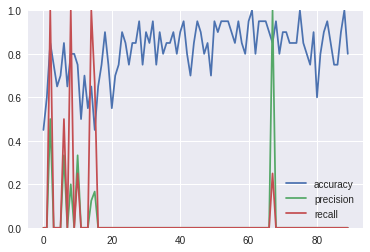

In [33]:
index = 10
plt.plot(results[list(results.keys())[0]].loc[:,["accuracy_label"+str(index), "precision_label"+str(index), "recall_label"+str(index)]])
plt.ylim(0, 1)
plt.legend(["accuracy", "precision", "recall"], loc=4)

## Focus on labels

In the next cells we will focus on label by characterizing the result with the label popularity in the training set; the popularity of a label being the number of images in which the object type is detected. First we load the Mapillary label definition.

In [34]:
with open('../data/config.json') as config_file:
    config = json.load(config_file)
config.keys()

dict_keys(['labels', 'mapping', 'folder_structure', 'version'])

The label names are easy to extract from this definition.

In [35]:
label_description = config['labels']
label_names = [l['name'] for l in label_description]
label_names[0:66:11]

['animal--bird',
 'construction--flat--pedestrian-area',
 'human--rider--other-rider',
 'object--bench',
 'object--street-light',
 'object--vehicle--car']

We can recover the labelled information from the training data set: it refers to output labels, *i.e.* true `y`.

In [36]:
train_labels = pd.read_csv("../data/training/output/labels.csv")
train_labels = train_labels.drop(["old_name", "new_name", "old_width", "width_ratio", "old_height", "height_ratio"], axis=1)
train_labels.shape

(18000, 66)

From the training set labels, and the label definitions, we build a pandas DataFrame that summarizes the information that must be stored regarding labels.

In [37]:
def build_category_description(names):
    """Build a dataframe that contains Mapillary label category description,
    with three columns "category", "subcategory" (empty if there is no subcategory), "object"
    Parameter
    ---------
    names: list
    Mapillary label names under the format <category>--<subcategory(if needed)>--<object>
    """
    category_description = []
    for n in label_names:
        cur_name = n.split('--')
        if len(cur_name) == 2:
            cur_name.insert(1, '')
        category_description.append(cur_name)
    return pd.DataFrame(category_description, columns=["category", "subcategory", "object"])

In [38]:
category_description = build_category_description(label_names)

In [39]:
image_count_per_label = train_labels.apply(sum, axis=0)
image_count_per_label.index = range(len(image_count_per_label))
for i in range(train_labels.shape[1]):
    print("The label '{}' is on {} images.".format(category_description.loc[i, "object"], image_count_per_label[i]))
category_description['nb_images'] = image_count_per_label


The label 'bird' is on 671 images.
The label 'ground-animal' is on 285 images.
The label 'curb' is on 15153 images.
The label 'fence' is on 11279 images.
The label 'guard-rail' is on 3001 images.
The label 'other-barrier' is on 3626 images.
The label 'wall' is on 8370 images.
The label 'bike-lane' is on 1337 images.
The label 'crosswalk-plain' is on 2179 images.
The label 'curb-cut' is on 8047 images.
The label 'parking' is on 2421 images.
The label 'pedestrian-area' is on 522 images.
The label 'rail-track' is on 641 images.
The label 'road' is on 17781 images.
The label 'service-lane' is on 1157 images.
The label 'sidewalk' is on 13166 images.
The label 'bridge' is on 2493 images.
The label 'building' is on 16484 images.
The label 'tunnel' is on 208 images.
The label 'person' is on 9093 images.
The label 'bicyclist' is on 1840 images.
The label 'motorcyclist' is on 1890 images.
The label 'other-rider' is on 210 images.
The label 'crosswalk-zebra' is on 5853 images.
The label 'general'

We can merge this label dataset with training step results, gathered at the beginning of this notebook.

In [40]:
train_results_by_category = train_results.iloc[:,14:].apply(np.mean, axis=0)
train_results_by_category.index = train_results_by_category.index.str.split('_label', expand=True)
train_results_by_category = train_results_by_category.unstack(level=0)
train_results_by_category.index = train_results_by_category.reset_index()["index"].apply(int)
train_results_by_category = category_description.join(train_results_by_category)
train_results_by_category

,category,subcategory,object,nb_images,accuracy,precision,recall
0,animal,,bird,671,0.936585,0.008130,0.024390
1,animal,,ground-animal,285,0.981707,0.000000,0.000000
2,construction,barrier,curb,15153,0.832927,0.852992,0.971306
3,construction,barrier,fence,11279,0.637805,0.655085,0.947601
4,construction,barrier,guard-rail,3001,0.641463,0.087282,0.056620
5,construction,barrier,other-barrier,3626,0.646341,0.095528,0.048780
6,construction,barrier,wall,8370,0.620732,0.086174,0.051829
7,construction,flat,bike-lane,1337,0.975610,0.000000,0.000000
8,construction,flat,crosswalk-plain,2179,0.886585,0.048200,0.044715
9,construction,flat,curb-cut,8047,0.528049,0.169333,0.061856


The central question is the following: **how do react accuracy, precision and recall measures regarding the label popularity?**

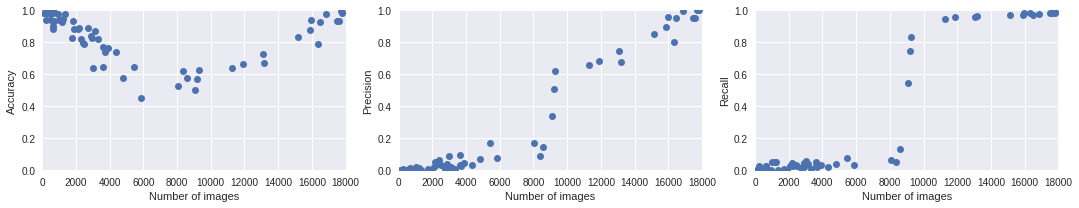

In [41]:
f, ax = plt.subplots(1, 3, figsize=(15, 3))
ax[0].plot(train_results_by_category.nb_images, train_results_by_category.accuracy, 'o')
ax[0].set_xlabel("Number of images")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlim(0, 18000)
ax[0].set_ylim(0, 1)
ax[1].plot(train_results_by_category.nb_images, train_results_by_category.precision, 'o')
ax[1].set_xlabel("Number of images")
ax[1].set_ylabel("Precision")
ax[1].set_ylim(0, 1)
ax[1].set_xlim(0, 18000)
ax[2].plot(train_results_by_category.nb_images, train_results_by_category.recall, 'o')
ax[2].set_xlabel("Number of images")
ax[2].set_ylabel("Recall")
ax[2].set_ylim(0, 1)
ax[2].set_xlim(0, 18000)
f.tight_layout()

This results are quite disappointing: it seems that the models are very performing when deciding if very popular (respectively rare) labels are (respectively are not) on images. The accuracy drops to 0.5-0.6 if label popularity is medium. The precision and recall measures shed a complementary light on the results: the models are better to predict true labels for popular categories, and they are particularly unefficient to predict true label for rare categories. In other words, the models predict almost always "true" for very common label, and almost always "false" for rare 

This conclusion should be toned by a numerical argument: sometimes they are not any true label to predict, in these cases the metric has been set to 0 (it should be better to change this default behavior, by the way).

An other point has to be added: we consider the mean value given by every models, for each metric. However this decision should not impact the result too deeply, as the models perform similarly.

We can provide a little bit more details on this description, by splitting these graphs according to the label categories.

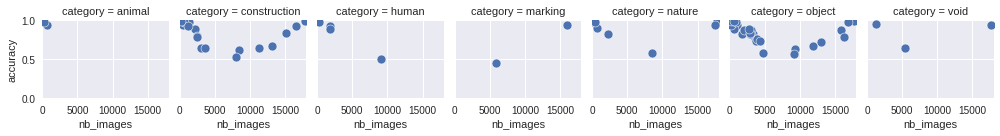

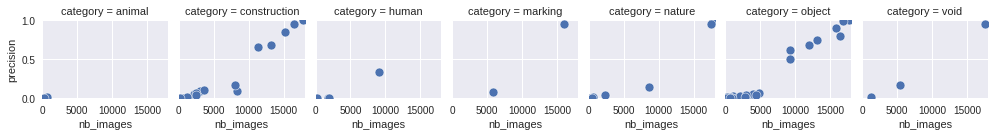

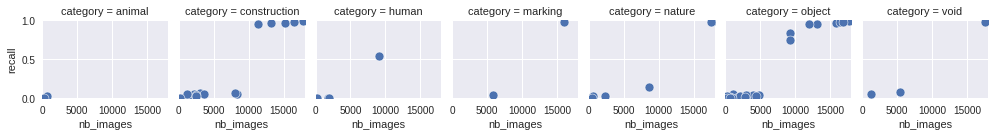

In [42]:
g_acc = sns.FacetGrid(train_results_by_category, col="category", col_wrap=7, palette="Set3", size=2)
(g_acc.map(plt.scatter, "nb_images", "accuracy", s=80, alpha=1., linewidth=.5, edgecolor="white")
        ).set(xlim=(0, 18000), ylim=(0, 1))
g_prec = sns.FacetGrid(train_results_by_category, col="category", col_wrap=7, palette="Set3", size=2)
(g_prec.map(plt.scatter, "nb_images", "precision", s=80, alpha=1., linewidth=.5, edgecolor="white")
        ).set(xlim=(0, 18000), ylim=(0, 1))
g_rec = sns.FacetGrid(train_results_by_category, col="category", col_wrap=7, palette="Set3", size=2)
(g_rec.map(plt.scatter, "nb_images", "recall", s=80, alpha=1., linewidth=.5, edgecolor="white")
        ).set(xlim=(0, 18000), ylim=(0, 1))